### Regularized logistic regression

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


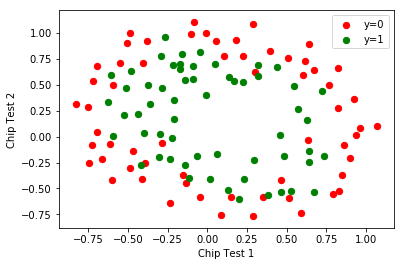

In [1]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

import matplotlib.pyplot as plt
import plot_utils

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
plt.show()
#plt.savefig('fig3.pdf')

         Current function value: 0.490663
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
Theta found by fmin_bfgs:  [ 0.02197704 -0.01732136  0.00616076 -0.05529338 -0.01329565 -0.03847024
 -0.01840571 -0.00775566 -0.00895833 -0.02271051 -0.0436179  -0.00237136
 -0.01421454 -0.0035338  -0.0414999  -0.0210241  -0.00474388 -0.00359643
 -0.00635186 -0.00505702 -0.03200628 -0.03431168 -0.00107627 -0.0070634
 -0.00038534 -0.00802117 -0.00156407 -0.04119543]
Final loss =  0.68036025309


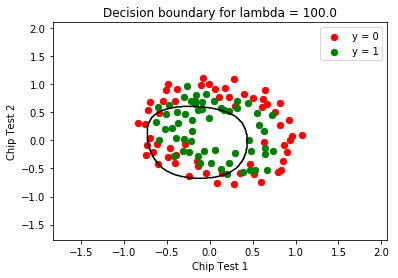

In [24]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 100.0
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print 'Theta found by fmin_bfgs: ',theta_opt
print "Final loss = ", reg_lr1.loss(theta_opt,XX,y,0.0)

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
plt.show()
#plt.savefig('fig4.pdf')

In [25]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)

# TODO: fill in the expression for accuracy of prediction
accuracy = np.sum([1 for i in range(len(y)) if y[i] == predy[i] ]) / float(len(y))
print "Accuracy on the training set = ", accuracy

Accuracy on the training set =  0.618644067797


### Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg:  [ 1.1421394   0.60141117  1.16712554 -1.87160974 -0.91574144 -1.26966693
  0.12658629 -0.3686536  -0.34511687 -0.17368655 -1.42387465 -0.04870064
 -0.60646669 -0.26935562 -1.16303832 -0.24327026 -0.20702143 -0.04326335
 -0.28028058 -0.286921   -0.46908732 -1.03633961  0.02914775 -0.29263743
  0.01728096 -0.32898422 -0.13801971 -0.93196832]
Loss with sklearn theta:  0


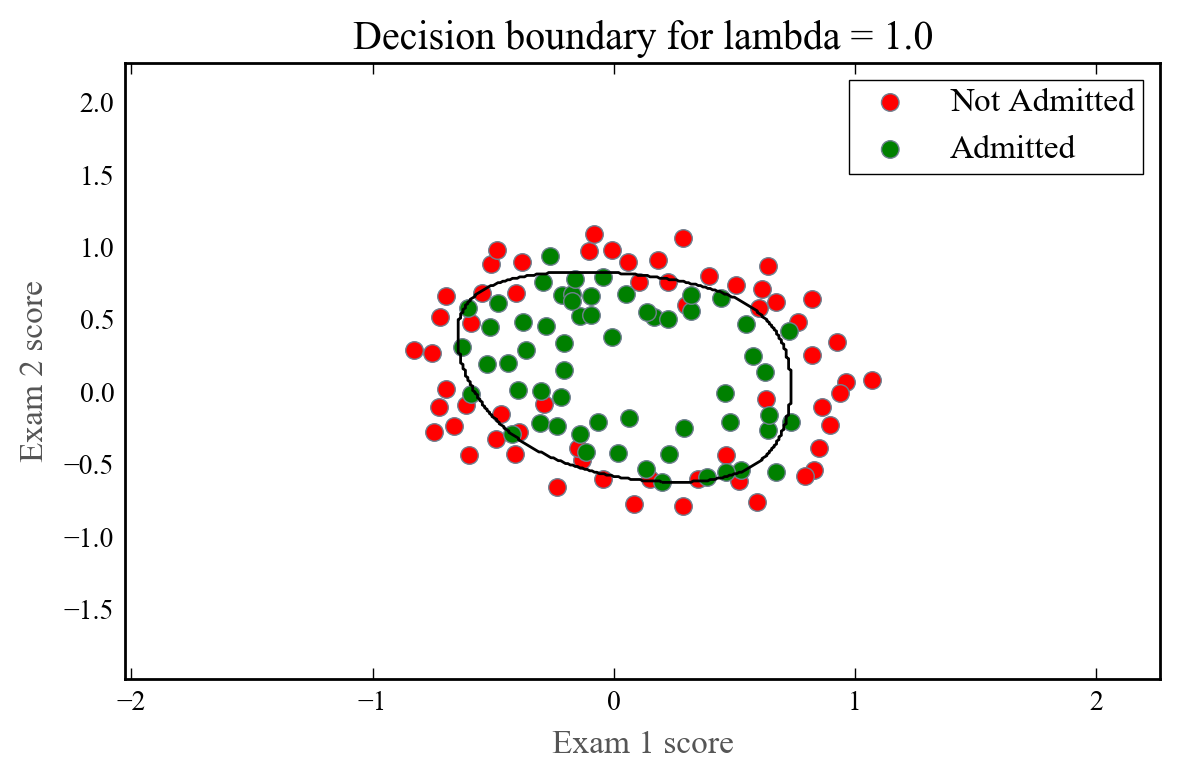

In [5]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg = 1.0

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print "Theta found by sklearn with L2 reg: ", sk_logreg_l2.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0)

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
#plt.savefig('fig4_sk.pdf')


### L1 regularized logistic regre

Theta found by sklearn with L1 reg:  [ 1.86966073  0.68660521  1.28040201 -4.86256203 -1.62180734 -2.34241917
  0.          0.          0.          0.          0.          0.          0.
  0.         -2.36724236  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.        ]
Loss with sklearn theta:  0
Computing regularization path ...


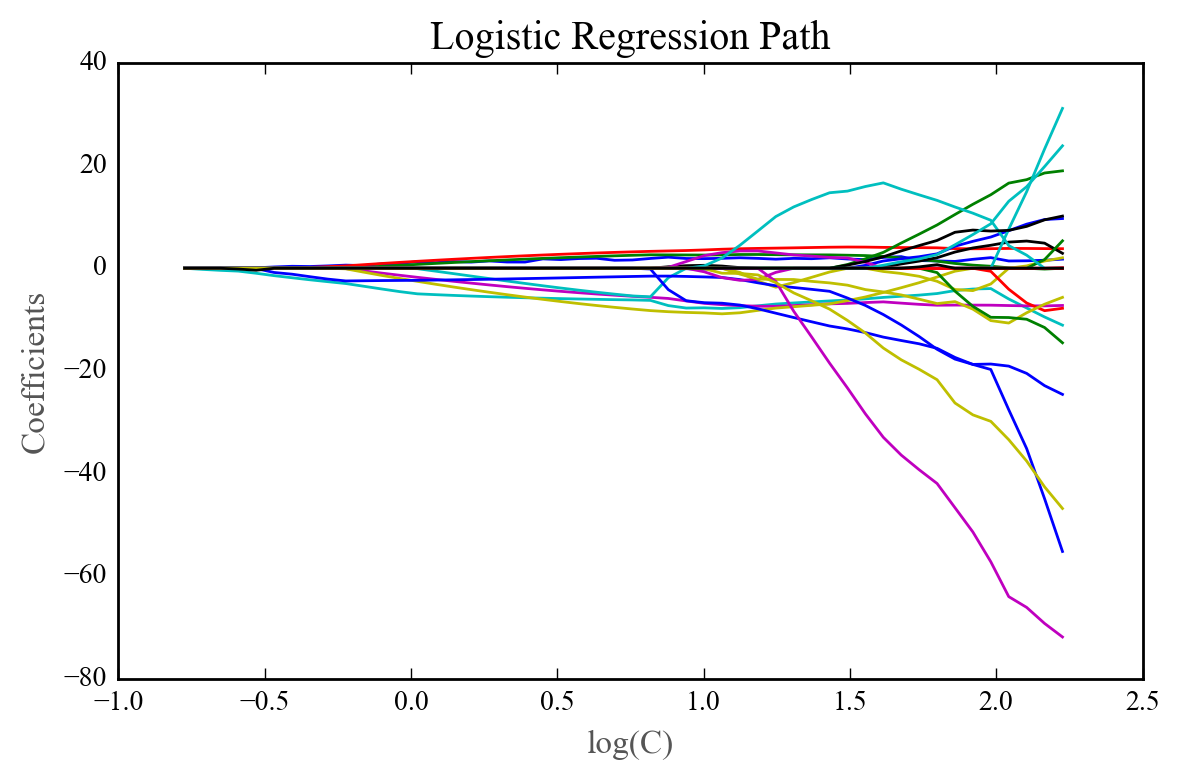

In [6]:
# L1 regularization witk sklearn LogisticRegression

sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print "Theta found by sklearn with L1 reg: ", sk_logreg_l1.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0)

# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y)
plt.show()
#plt.savefig('fig5.pdf')